In [24]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./audio_features.csv', index_col=0)

In [5]:
df

,filename,gender,sampling_rate,dialect,source,mic_type,pitch,intonation,f1_diff,f2_diff
0,./audio_data/voxforge/lindavg-20081007-ovc/wav...,female,48000,American English,VoxForge,headset mic,227.870631,81.760692,-13.251472,192.270752
1,./audio_data/voxforge/anonymous-20171019-nwf/w...,female,48000,American English,VoxForge,laptop built,295.205005,103.197453,55.997711,64.961624
2,./audio_data/voxforge/anonymous-20100604-qub/w...,female,48000,American English,VoxForge,laptop built,180.343527,82.408648,3.152454,-221.208206
3,./audio_data/voxforge/anonymous-20111230-bqh/w...,female,48000,American English,VoxForge,laptop built,186.590146,69.239924,25.505727,-140.413540
4,./audio_data/voxforge/anonymous-20081026-ewe/w...,female,48000,American English,VoxForge,laptop built,163.333829,43.920077,18.454468,-46.543376
...,...,...,...,...,...,...,...,...,...,...
5219,./audio_data/mcgill/FH/FH45_02.wav,female,48000,Canadian English,McGill,stereo mic,194.624295,36.324828,-3.813254,68.298148
5220,./audio_data/mcgill/FH/FH47_05.wav,female,48000,Canadian English,McGill,stereo mic,191.549669,33.684276,-46.658710,242.273596
5221,./audio_data/mcgill/FH/FH47_10.wav,female,48000,Canadian English,McGill,stereo mic,167.292513,27.059581,86.552900,2.681013
5222,./audio_data/mcgill/FH/FH47_04.wav,female,48000,Canadian English,McGill,stereo mic,184.234636,39.649572,50.520517,247.121826


In [6]:
def get_duration(row):
    return librosa.get_duration(filename=row['filename'])

df['duration'] = df.apply(get_duration, axis=1)

In [20]:
final_df = df[(df.f1_diff != -1000) | (df.f2_diff != -1000)]

In [36]:
final_df.to_csv('./audio_features_final.csv')

In [25]:
male_df = final_df[final_df.gender == 'male']
female_df = final_df[final_df.gender == 'female']

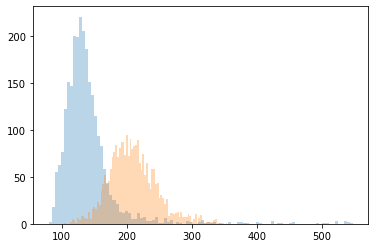

In [28]:
plt.hist(male_df.pitch, bins=100, alpha=0.3)
plt.hist(female_df.pitch, bins=100, alpha=0.3)
plt.show()

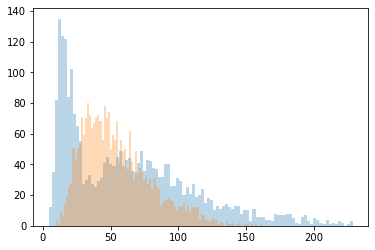

In [29]:
plt.hist(male_df.intonation, bins=100, alpha=0.3)
plt.hist(female_df.intonation, bins=100, alpha=0.3)
plt.show()

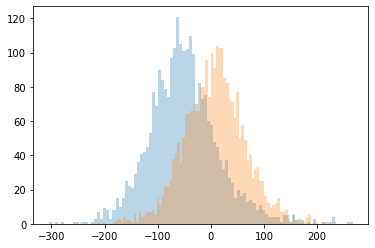

In [30]:
plt.hist(male_df.f1_diff, bins=100, alpha=0.3)
plt.hist(female_df.f1_diff, bins=100, alpha=0.3)
plt.show()

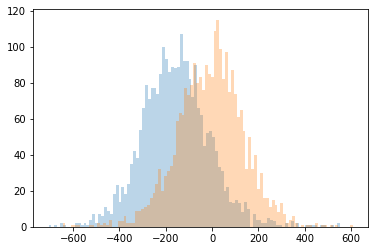

In [31]:
plt.hist(male_df.f2_diff, bins=100, alpha=0.3)
plt.hist(female_df.f2_diff, bins=100, alpha=0.3)
plt.show()